In [2]:
# Import Libraries

In [2]:
import pandas as pd
import datetime
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
jap = pd.read_csv('jap_data_clean.csv') # japam Earthquake Data
tur = pd.read_csv('tur_data_clean.csv') # Turkey Earthquake Data


# Standardize your data:


In [48]:
target = jap[['latitude', 'longitude', 'depth', 'mag']]
#features2 = df[['latitude', 'lo~ngitude', 'mag']]
# These are the features we need to select and we will create a new dataframe for it.



scaler = StandardScaler() # We will standardize our data (Z-score normalization)
scaled_data= scaler.fit_transform(target)
#caled_data2= scaler.fit_transform(features2)

## Elbow method for determining klusters:

C:\Users\khans71\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khans71\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khans71\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khans71\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

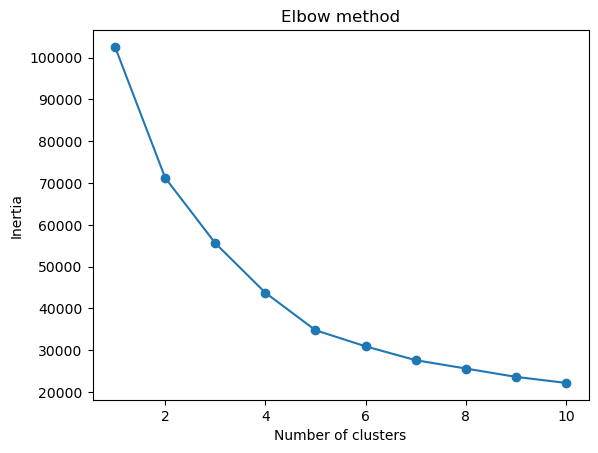

In [49]:
inertias = []
#create an empty bracket first

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Elbow method for clustering')
plt.show()

# k means clustering

In [50]:
# Creating an instance of KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(scaled_data)


cluster_labels = kmeans.labels_ +1
jap['cluster'] = cluster_labels

C:\Users\khans71\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# ===========================

## Visulize clusters on a map

In [51]:
map1 = jap[['year','cluster', 'latitude', 'longitude']]
map1 = jap.loc[(jap['year'] == 2022)]


bins = [0, 1, 2, 3, 4]
colors = ['green', 'blue', 'orange', 'red']
map1['color'] = pd.cut(map1['cluster'], bins = bins, labels = colors)


maps1 = folium.Map(location=[36.655226998000046, 139.27149500000007], zoom_start=5)


for index, row in map1.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], popup = row['cluster'], radius=10,
                        color=row['color']).add_to(maps1)
    
    
#maps.save('Clustering map Japan 2022.html')    
maps1

C:\Users\khans71\AppData\Local\Temp\ipykernel_956\904280602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map1['color'] = pd.cut(map1['cluster'], bins = bins, labels = colors)


# Turkey Cluster

In [40]:
target2 = tur[['latitude', 'longitude', 'depth', 'mag']]
# These are the features we need to select and we will create a new dataframe for it.



scaler2 = StandardScaler() # We will standardize our data (Z-score normalization)
scaled_data2= scaler2.fit_transform(target2)


# Creating an instance of KMeans clustering algorithm
kmeans2 = KMeans(n_clusters=4, random_state=42)




kmeans2.fit(scaled_data2)


cluster_labels2 = kmeans2.labels_ +1
tur['cluster'] = cluster_labels2

C:\Users\khans71\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
map2 = tur[['year','cluster', 'latitude', 'longitude']]
map2 = tur.loc[(tur['year'] == 2022)]


bins = [0, 1, 2, 3, 4]
colors = ['green', 'blue', 'orange', 'red']
map2['color'] = pd.cut(map2['cluster'], bins = bins, labels = colors)


maps2 = folium.Map(location=[39.066250645000025, 35.142286272000035], zoom_start=5)


for index, row in map2.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], popup = row['cluster'], radius=10,
                        color=row['color']).add_to(maps2)
    
    
maps2.save('Clustering map Turkey 2022.html')    
maps2

C:\Users\khans71\AppData\Local\Temp\ipykernel_956\664436711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map2['color'] = pd.cut(map2['cluster'], bins = bins, labels = colors)


# ===============================

# clusters mean for JAPAN

In [184]:
cluster_1_data = jap[jap['cluster'] == 1]  # Filter for Cluster 1
cluster_2_data = jap[jap['cluster'] == 2]  # Filter for Cluster 2
cluster_3_data = jap[jap['cluster'] == 3]  # Filter for Cluster 3
cluster_4_data = jap[jap['cluster'] == 4]  # Filter for Cluster 4


In [185]:
mean_depth_cluster_1 = cluster_1_data['depth'].mean()
mean_depth_cluster_2 = cluster_2_data['depth'].mean()
mean_depth_cluster_3 = cluster_3_data['depth'].mean()
mean_depth_cluster_4 = cluster_4_data['depth'].mean()


In [186]:
mean_mag_cluster_1 = cluster_1_data['mag'].mean()
mean_mag_cluster_2 = cluster_2_data['mag'].mean()
mean_mag_cluster_3 = cluster_3_data['mag'].mean()
mean_mag_cluster_4 = cluster_4_data['mag'].mean()

In [187]:
print('Japan clusters')
print('The mean of depth for cluster 1 is: ', mean_depth_cluster_1)
print('The mean of depth for cluster 2 is: ', mean_depth_cluster_2)
print('The mean of depth for cluster 3 is: ', mean_depth_cluster_3)
print('The mean of depth for cluster 4 is: ', mean_depth_cluster_4)
print('##############')
print('The mean of mag for cluster 1 is: ', mean_mag_cluster_1)
print('The mean of mag for cluster 2 is: ', mean_mag_cluster_2)
print('The mean of mag for cluster 3 is: ', mean_mag_cluster_3)
print('The mean of mag for cluster 4 is: ', mean_mag_cluster_4)

Japan clusters
The mean of depth for cluster 1 is:  38.20150718835305
The mean of depth for cluster 2 is:  46.73528090575275
The mean of depth for cluster 3 is:  370.6009419134396
The mean of depth for cluster 4 is:  49.52681336057564
##############
The mean of mag for cluster 1 is:  4.3793266606005465
The mean of mag for cluster 2 is:  4.480544675642595
The mean of mag for cluster 3 is:  4.180922551252848
The mean of mag for cluster 4 is:  4.617016967220397


# clusters mean for Turkey

In [188]:
cluster_1_data = tur[tur['cluster'] == 1]  # Filter for Cluster 1
cluster_2_data = tur[tur['cluster'] == 2]  # Filter for Cluster 2
cluster_3_data = tur[tur['cluster'] == 3]  # Filter for Cluster 3
cluster_4_data = tur[tur['cluster'] == 4]  # Filter for Cluster 4

mean_depth_cluster_1 = cluster_1_data['depth'].mean()
mean_depth_cluster_2 = cluster_2_data['depth'].mean()
mean_depth_cluster_3 = cluster_3_data['depth'].mean()
mean_depth_cluster_4 = cluster_4_data['depth'].mean()

mean_mag_cluster_1 = cluster_1_data['mag'].mean()
mean_mag_cluster_2 = cluster_2_data['mag'].mean()
mean_mag_cluster_3 = cluster_3_data['mag'].mean()
mean_mag_cluster_4 = cluster_4_data['mag'].mean()

In [189]:
print('Turkey clusters')
print('The mean of depth for cluster 1 is: ', mean_depth_cluster_1)
print('The mean of depth for cluster 2 is: ', mean_depth_cluster_2)
print('The mean of depth for cluster 3 is: ', mean_depth_cluster_3)
print('The mean of depth for cluster 4 is: ', mean_depth_cluster_4)
print('##############')
print('The mean of mag for cluster 1 is: ', mean_mag_cluster_1)
print('The mean of mag for cluster 2 is: ', mean_mag_cluster_2)
print('The mean of mag for cluster 3 is: ', mean_mag_cluster_3)
print('The mean of mag for cluster 4 is: ', mean_mag_cluster_4)

Turkey clusters
The mean of depth for cluster 1 is:  14.069919543023822
The mean of depth for cluster 2 is:  9.540858955965126
The mean of depth for cluster 3 is:  10.758694222639736
The mean of depth for cluster 4 is:  76.26059798994974
##############
The mean of mag for cluster 1 is:  3.5265192027224113
The mean of mag for cluster 2 is:  2.8825515947467166
The mean of mag for cluster 3 is:  4.241803663691874
The mean of mag for cluster 4 is:  3.9482412060301506
